In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Locate and load the data file
bc = load_breast_cancer()
bc_df = pd.DataFrame(data= np.c_[bc.data, [bc.target_names[v] for v in bc.target]],
                     columns= list(bc.feature_names)+['cancer'])
# See how the data looks like
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,malignant
2,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,malignant
4,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,malignant


In [2]:
# Populate the dataset, cancer column is target variable
X = bc_df.loc[:, bc_df.columns != 'cancer'].values
y = bc_df.loc[:, bc_df.columns == 'cancer'].values.ravel()

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Display OP
def annot(opi, x, y):
    plt.annotate(f"OP{opi}", xy=(x, y), xytext=(.90*x+.1, .80*y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98, random_state=14)

# Parameter to vary for Logistic Regression
C = (2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 2e1, 1e2)

# Let's vary C and generate training/testing sessions to collect data for ROC
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=14,
                                               penalty='l1',
                                               solver='liblinear',
                                               class_weight='balanced',
                                               C=c,
                                               multi_class='auto',
                                               max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf
    #
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.803, C=      0.20000, TPR 0.938, FPR 0.280
Test Accuracy= 0.860, C=      0.50000, TPR 0.948, FPR 0.193
Test Accuracy= 0.912, C=      0.80000, TPR 0.839, FPR 0.043
Test Accuracy= 0.896, C=      1.00000, TPR 0.777, FPR 0.032
Test Accuracy= 0.866, C=      2.00000, TPR 0.682, FPR 0.023
Test Accuracy= 0.837, C=      5.00000, TPR 0.602, FPR 0.020
Test Accuracy= 0.823, C=     10.00000, TPR 0.559, FPR 0.017
Test Accuracy= 0.814, C=     20.00000, TPR 0.531, FPR 0.014
Test Accuracy= 0.794, C=    100.00000, TPR 0.460, FPR 0.003


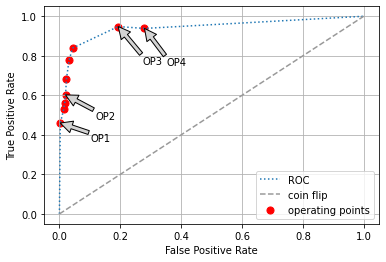

In [5]:
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()